# Лабораторная работа № 2
**Вариант:** 9

In [1]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png', 'pdf')

In [19]:
def plot_history(h, *metrics):
    for metric in metrics:
        print(f"{metric}: {h.history[metric][-1]:.4f}")
    figure = plt.figure(figsize=(6 * len(metrics), 4))
    for i, metric in enumerate(metrics, 1):
        ax = figure.add_subplot(1, len(metrics), i)
        ax.xaxis.get_major_locator().set_params(integer=True)
        plt.title(metric)
        plt.plot(h.history[metric], '-')
    plt.show()

In [4]:
window = 5

## Аппроксимация функции

In [5]:
signal1 = lambda t: np.sin(t ** 2 - 2 * t + 3)
t1 = np.arange(0, 6, 0.025)

data1 = signal1(t1)
target1 = data1[window:]
data1 = np.array([data1[i:i+window] for i in range(0, len(data1) - window)])

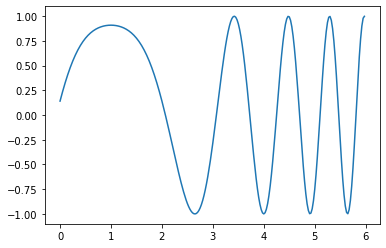

In [6]:
plt.plot(t1, signal1(t1))
plt.show()

In [7]:
model1 = keras.models.Sequential([
    keras.layers.Dense(1, input_dim=window, activation='linear')
])

model1.compile(keras.optimizers.SGD(0.01), 'mse', ['mse'])

hist1 = model1.fit(data1, target1, batch_size=1, epochs=50, verbose=0, shuffle=True)

mse: 0.0017


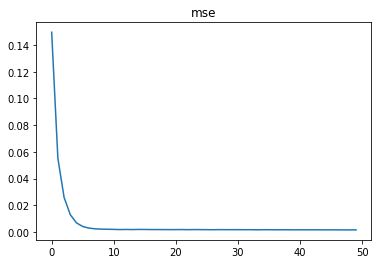

In [20]:
plot_history(hist1, 'mse')

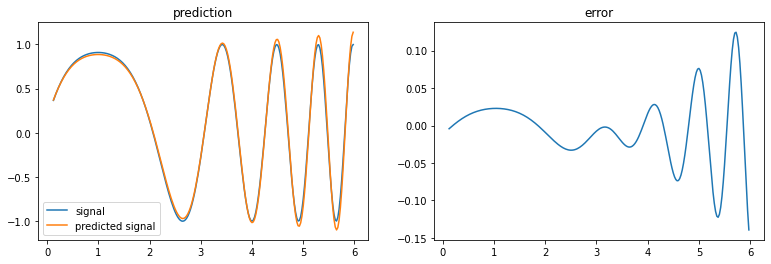

In [10]:
pred1 = model1.predict(data1)
figure = plt.figure(figsize=(13, 4))
figure.add_subplot(1, 2, 1)
plt.title('prediction')
plt.plot(t1[window:], target1, label='signal')
plt.plot(t1[window:], pred1, label='predicted signal')
plt.legend()
figure.add_subplot(1, 2, 2)
plt.title('error')
plt.plot(t1[window:], target1 - pred1.flat)
plt.show()

## Подавление помех

In [11]:
noise_signal = lambda t: np.sin(t ** 2 - 2 * t) / 4
signal2 = lambda t: np.sin(t ** 2 - 2 * t + 3)
t2 = np.arange(0, 6, 0.025)

data2 = noise_signal(t2)
data2 = np.array([data2[i:i+window] for i in range(0, len(data2) - window)])
target2 = signal2(t2)[window:]

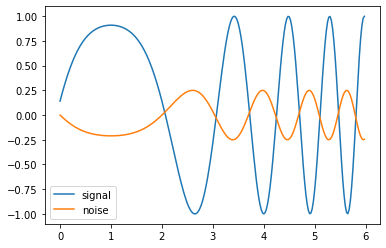

In [12]:
plt.plot(t2, signal2(t2), label='signal')
plt.plot(t2, noise_signal(t2), label='noise')
plt.legend()
plt.show()

In [ ]:
model2 = keras.models.Sequential([
    keras.layers.Dense(1, input_dim=window, activation='linear')
])

model2.compile(keras.optimizers.SGD(0.01), 'mse', ['mse'])

hist2 = model2.fit(data2, target2, batch_size=1, epochs=50, verbose=0, shuffle=True)

mse: 0.0055


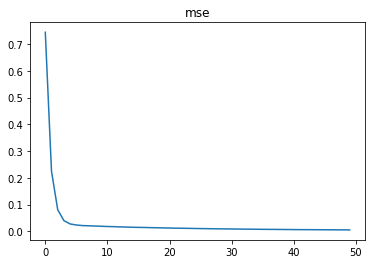

In [21]:
plot_history(hist2, 'mse')

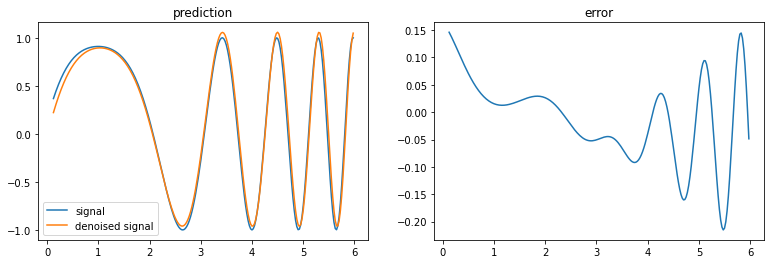

In [18]:
pred2 = model2.predict(data2)
figure = plt.figure(figsize=(13, 4))
figure.add_subplot(1, 2, 1)
plt.title('prediction')
plt.plot(t2[window:], target2, label='signal')
plt.plot(t2[window:], pred2, label='denoised signal')
plt.legend()
figure.add_subplot(1, 2, 2)
plt.title('error')
plt.plot(t2[window:], target2 - pred2.flat)
plt.show()